<a href="https://colab.research.google.com/github/ce3tnia/Digital-Festival-by-Rakamin---Data-Science/blob/main/Analysis_Loan_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Cecilia Tania Emanuella

# Import Libraries

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load Dataset

In [2]:
df = pd.read_csv('/content/gdrive/MyDrive/dataset/loan_customer.csv')
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


# EDA

## Descriptive Statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

## Statistical summary

In [4]:
df.drop('phone_number',axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
applicant_income,612.0,5681.549020,9056.454103,150.0,2874.5,3812.5,5815.75,170578.0
coapplicant_income,621.0,1616.874267,2915.075138,0.0,0.0,1167.0,2302.00,41667.0
loan_amount,621.0,145133.655395,84011.115879,9000.0,100000.0,125000.0,165000.00,700000.0
loan_term_month,621.0,342.608696,64.090837,12.0,360.0,360.0,360.00,480.0
loan_term_year,621.0,28.550725,5.340903,1.0,30.0,30.0,30.00,40.0
credit_history,570.0,0.842105,0.364963,0.0,1.0,1.0,1.00,1.0


In [5]:
df.describe(include=object).T

,count,unique,top,freq
loan_id,621,616,LP002277,2
birth_date,572,541,1987-10-18,2
gender,608,2,Male,495
married,618,2,Yes,403
dependents,605,4,0,349
education,620,2,Graduate,485
self_employed,588,2,No,506
has_credit_card,88,2,no,52
property_type,620,3,apartment,235
loan_status,621,2,APPROVE,426


## Feature Selection

In [6]:
categoric = ['gender', 'married', 'dependents', 'education', 'self_employed','has_credit_card', 'property_type']
numeric = [x for x in df.columns if x not in categoric and x not in ('loan_id', 'birth_date', 'phone_number', 'loan_status')]

## Check Outlier

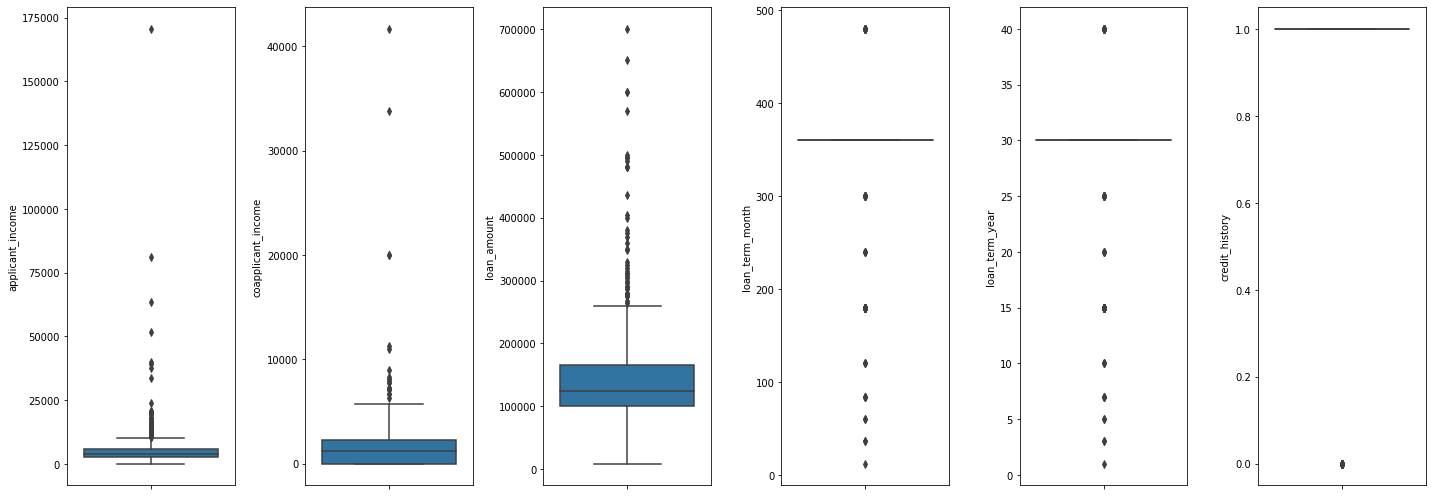

In [7]:
plt.figure(figsize=(20,7)) 
for i in range(0, len(numeric)):
  plt.subplot(1, len(numeric), i+1)
  sns.boxplot(y=df[numeric[i]])
  plt.tight_layout()

## Visualization Features

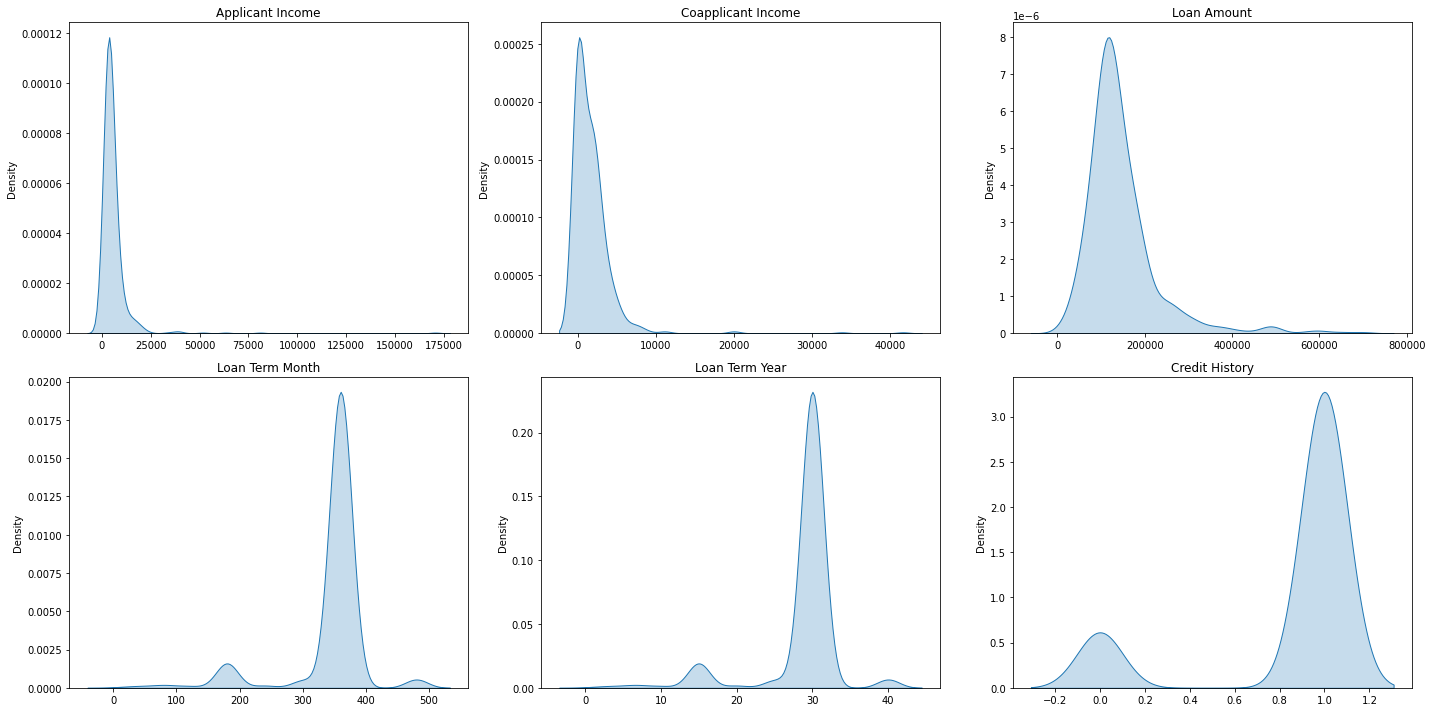

In [8]:
plt.figure(figsize=(20,10))

len_column = lambda x: len(x)//2 if len(x) % 2 == 0 else (len(x)+1)//2

for i in range(0, len(numeric)):
  plt.subplot(2,len_column(numeric), i+1)
  ax = sns.kdeplot(x=df[numeric[i]], fill=True)
  for container in ax.containers:
    ax.bar_label(container)
  
  plt.title(numeric[i].replace('_', ' ').title())
  plt.xlabel('')

  plt.tight_layout()

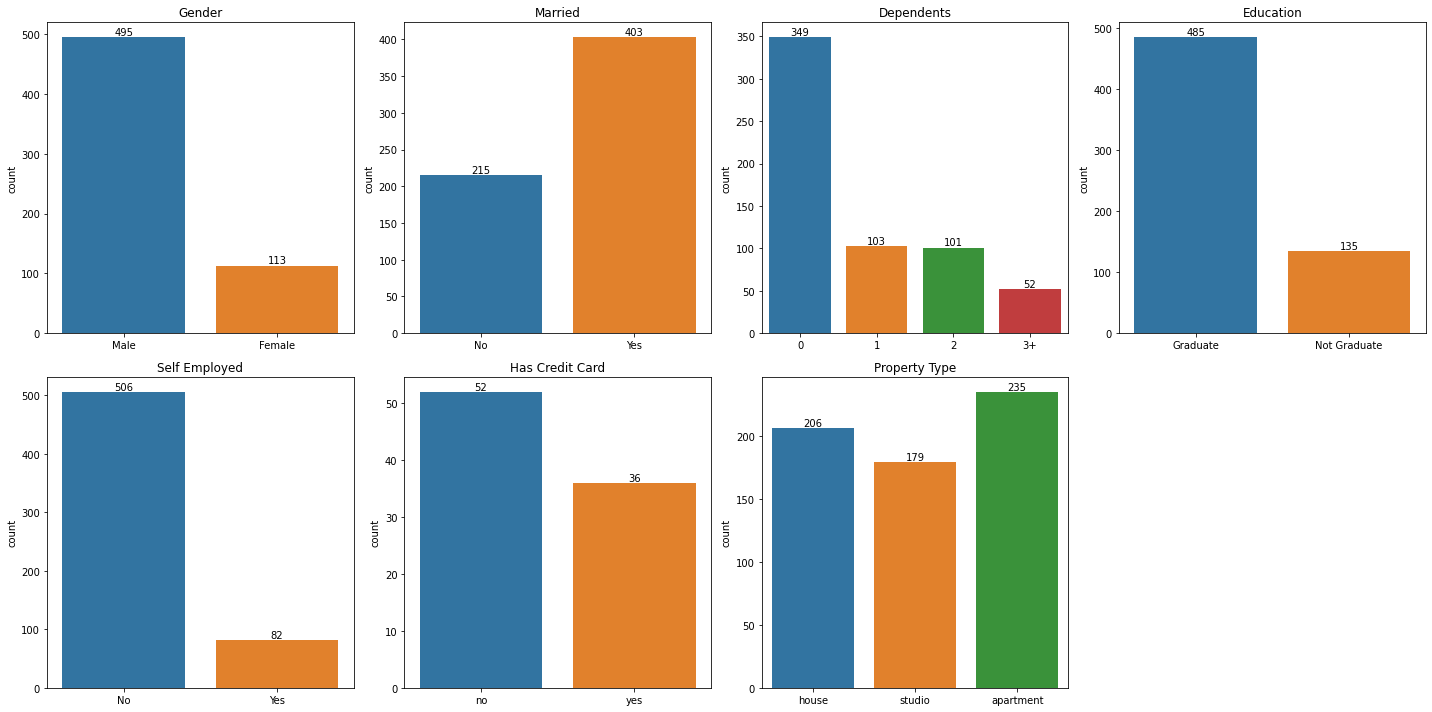

In [9]:
plt.figure(figsize=(20,10))

for i in range(0, len(categoric)):
  ax = plt.subplot(2,len_column(categoric),i+1)
  sns.countplot(data=df, x=categoric[i])
  for container in ax.containers:
    ax.bar_label(container)
  
  plt.title(categoric[i].replace('_', ' ').title())
  plt.xlabel('')
  plt.tight_layout()

## Check Missing Values


In [10]:
df.isna().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

## Check Duplicate Data


In [11]:
df.duplicated().sum()

1

In [12]:
print('Total Duplicate Data based on loan_id: {}'.format(df['loan_id'].duplicated().sum()))

Total Duplicate Data based on loan_id: 5


In [13]:
duplicate_loan_id = df.duplicated(['loan_id','phone_number', 'loan_status'])
df[duplicate_loan_id]

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
90,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,no,apartment,APPROVE
279,LP001904,1986-01-30,6.281152e+10,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,NaN,house,APPROVE
308,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,yes,house,REJECT
363,LP002160,1990-11-27,6.281153e+11,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,NaN,apartment,APPROVE
401,LP002277,1972-06-12,6.281384e+11,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,NaN,house,REJECT


In [14]:
duplicate_id = ['LP001310','LP001904','LP001990','LP002160','LP002277']
df[df['loan_id'].isin(duplicate_id)]

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
89,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,NaN,apartment,APPROVE
90,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,no,apartment,APPROVE
278,LP001904,1986-01-30,6.281152e+10,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,NaN,house,APPROVE
279,LP001904,1986-01-30,6.281152e+10,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,NaN,house,APPROVE
307,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,NaN,house,REJECT
308,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,yes,house,REJECT
362,LP002160,1990-11-27,6.281153e+11,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,yes,apartment,APPROVE
363,LP002160,1990-11-27,6.281153e+11,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,NaN,apartment,APPROVE
400,LP002277,1972-06-12,6.281384e+11,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,yes,house,REJECT
401,LP002277,1972-06-12,6.281384e+11,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,NaN,house,REJECT


## Check Unique Values

In [15]:
df.nunique()

loan_id               616
birth_date            541
phone_number          564
gender                  2
married                 2
dependents              4
education               2
self_employed           2
applicant_income      500
coapplicant_income    287
loan_amount           203
loan_term_month        10
loan_term_year         10
credit_history          2
has_credit_card         2
property_type           3
loan_status             2
dtype: int64

In [16]:
def check_overall_status(data, temp=list()):
  if isinstance(temp, list):
    temp.clear()
    columns_name = ['Feature', 'Data Type', 'Null Data', 'Number Unique', 'Samples']
    for i in data.columns:
      temp.append([i, data[i].dtype, data[i].isna().sum(), data[i].nunique(), data[i].unique()])
    dataframe = pd.DataFrame(data=temp, columns=columns_name)
  return dataframe

check_overall_status(df)

,Feature,Data Type,Null Data,Number Unique,Samples
0,loan_id,object,0,616,"[LP001002, LP001003, LP001005, LP001006, LP001..."
1,birth_date,object,49,541,"[1977-05-15, 1979-08-24, 1991-03-28, 1980-06-0..."
2,phone_number,float64,52,564,"[628114203187.0, 628776449212.0, 628119240537...."
3,gender,object,13,2,"[Male, Female, nan]"
4,married,object,3,2,"[No, Yes, nan]"
5,dependents,object,16,4,"[0, 1, 2, 3+, nan]"
6,education,object,1,2,"[Graduate, Not Graduate, nan]"
7,self_employed,object,33,2,"[No, Yes, nan]"
8,applicant_income,float64,9,500,"[5849.0, 4583.0, 3000.0, 2583.0, 6000.0, 5417...."
9,coapplicant_income,float64,0,287,"[0.0, 1508.0, 2358.0, 4196.0, 1516.0, 2504.0, ..."


# Data Cleansing

## Handling Missing Values

In [17]:
df_drop = df.dropna(axis=0, subset=['birth_date', 'phone_number', 'gender'])
check_overall_status(df_drop)

,Feature,Data Type,Null Data,Number Unique,Samples
0,loan_id,object,0,511,"[LP001002, LP001003, LP001005, LP001006, LP001..."
1,birth_date,object,0,487,"[1977-05-15, 1979-08-24, 1991-03-28, 1980-06-0..."
2,phone_number,float64,0,511,"[628114203187.0, 628776449212.0, 628119240537...."
3,gender,object,0,2,"[Male, Female]"
4,married,object,2,2,"[No, Yes, nan]"
5,dependents,object,13,4,"[0, 1, 2, 3+, nan]"
6,education,object,1,2,"[Graduate, Not Graduate, nan]"
7,self_employed,object,27,2,"[No, Yes, nan]"
8,applicant_income,float64,8,420,"[5849.0, 4583.0, 3000.0, 2583.0, 6000.0, 5417...."
9,coapplicant_income,float64,0,246,"[0.0, 1508.0, 2358.0, 4196.0, 1516.0, 2504.0, ..."


In [18]:
df_drop.loc[df['married'].isna(), :]

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
105,LP001357,1989-05-26,6.281328e+11,Male,NaN,NaN,Graduate,No,NaN,754.0,160000,360,30,1.0,NaN,house,APPROVE
229,LP001760,1986-04-09,6.285720e+11,Male,NaN,NaN,Graduate,No,4758.0,0.0,158000,480,40,1.0,no,apartment,APPROVE


In [19]:
df_drop = df_drop.drop('has_credit_card', axis=1)

In [20]:
subsets = ['married', 'dependents', 'self_employed', 'applicant_income', 'credit_history']
df_drop_final = df_drop.dropna(axis=0, subset=subsets)
check_overall_status(df_drop_final)

,Feature,Data Type,Null Data,Number Unique,Samples
0,loan_id,object,0,429,"[LP001002, LP001003, LP001005, LP001006, LP001..."
1,birth_date,object,0,411,"[1977-05-15, 1979-08-24, 1991-03-28, 1980-06-0..."
2,phone_number,float64,0,429,"[628114203187.0, 628776449212.0, 628119240537...."
3,gender,object,0,2,"[Male, Female]"
4,married,object,0,2,"[No, Yes]"
5,dependents,object,0,4,"[0, 1, 2, 3+]"
6,education,object,0,2,"[Graduate, Not Graduate]"
7,self_employed,object,0,2,"[No, Yes]"
8,applicant_income,float64,0,368,"[5849.0, 4583.0, 3000.0, 2583.0, 6000.0, 5417...."
9,coapplicant_income,float64,0,211,"[0.0, 1508.0, 2358.0, 4196.0, 1516.0, 2504.0, ..."


## Handling Duplicated Data

In [21]:
df_drop_final[df_drop_final.duplicated()]

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
90,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,apartment,APPROVE
279,LP001904,1986-01-30,6.281152e+10,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,house,APPROVE
308,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,house,REJECT
363,LP002160,1990-11-27,6.281153e+11,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,apartment,APPROVE
401,LP002277,1972-06-12,6.281384e+11,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,house,REJECT


In [22]:
df_clear_final = df_drop_final.drop_duplicates(subset=['loan_id'])
print(f'Total Duplicate Data: {df_clear_final.duplicated().sum()}')

Total Duplicate Data: 0


In [23]:
df_clear_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 619
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             429 non-null    object 
 1   birth_date          429 non-null    object 
 2   phone_number        429 non-null    float64
 3   gender              429 non-null    object 
 4   married             429 non-null    object 
 5   dependents          429 non-null    object 
 6   education           429 non-null    object 
 7   self_employed       429 non-null    object 
 8   applicant_income    429 non-null    float64
 9   coapplicant_income  429 non-null    float64
 10  loan_amount         429 non-null    int64  
 11  loan_term_month     429 non-null    int64  
 12  loan_term_year      429 non-null    int64  
 13  credit_history      429 non-null    float64
 14  property_type       429 non-null    object 
 15  loan_status         429 non-null    object 
dtypes: float

## Handling Outlier

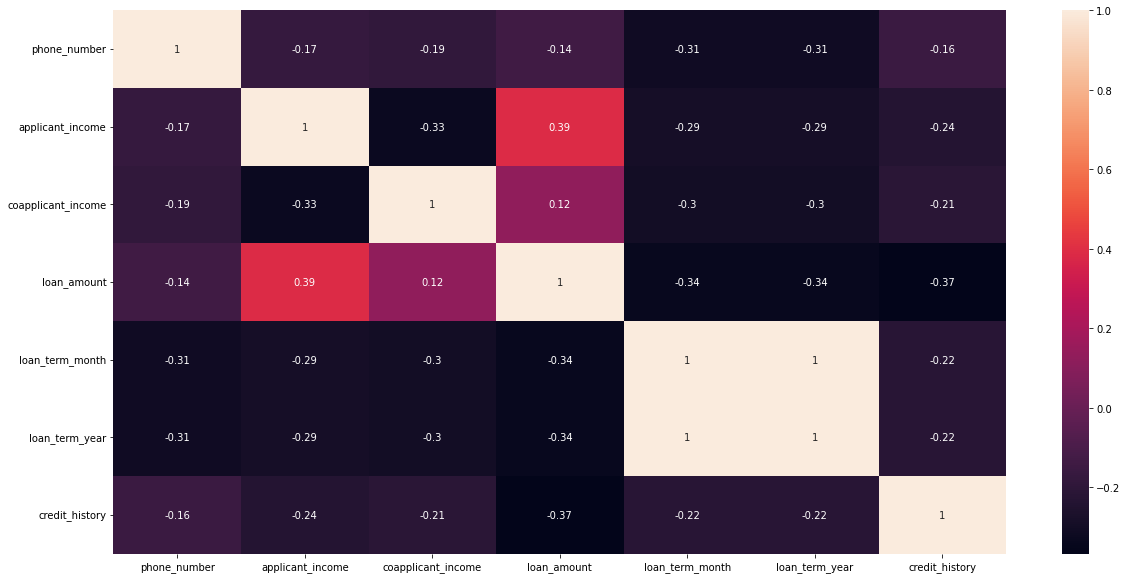

In [24]:
corr = df_clear_final.corr()

top_corr_features = corr.index
plt.figure(figsize=(20,10))
#plot heat map
g=sns.heatmap(corr[top_corr_features].corr(),annot=True)

In [25]:
# Look for outliers in applicant_income
Q1, Q3 = np.percentile(df_clear_final['applicant_income'],[25,75])
IQR = Q3 - Q1
low = Q1 - (1.5 * IQR)
high = Q3 + (1.5 * IQR)

print(f'Q1: {Q1} \nQ3: {Q3} \nIQR: {IQR} \nLow: {low} \nHigh: {high} \n')

df_clear_final[(df_clear_final['applicant_income'] <= low) | (df_clear_final['applicant_income'] >= high)].count()

Q1: 2876.0 
Q3: 5935.0 
IQR: 3059.0 
Low: -1712.5 
High: 10523.5 



loan_id               32
birth_date            32
phone_number          32
gender                32
married               32
dependents            32
education             32
self_employed         32
applicant_income      32
coapplicant_income    32
loan_amount           32
loan_term_month       32
loan_term_year        32
credit_history        32
property_type         32
loan_status           32
dtype: int64

In [26]:
# applicant_income data that is not an outlier
df_notout = df_clear_final[(df_clear_final['applicant_income'] >= low) & (df_clear_final['applicant_income'] <= high)]
df_notout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 619
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             397 non-null    object 
 1   birth_date          397 non-null    object 
 2   phone_number        397 non-null    float64
 3   gender              397 non-null    object 
 4   married             397 non-null    object 
 5   dependents          397 non-null    object 
 6   education           397 non-null    object 
 7   self_employed       397 non-null    object 
 8   applicant_income    397 non-null    float64
 9   coapplicant_income  397 non-null    float64
 10  loan_amount         397 non-null    int64  
 11  loan_term_month     397 non-null    int64  
 12  loan_term_year      397 non-null    int64  
 13  credit_history      397 non-null    float64
 14  property_type       397 non-null    object 
 15  loan_status         397 non-null    object 
dtypes: float

In [27]:
# Look for outliers on loan_amount from income_applicant data that are not outliers
Q1, Q3 = np.percentile(df_notout['loan_amount'],[25,75])
IQR = Q3 - Q1
low = Q1 - (1.5 * IQR)
high = Q3 + (1.5 * IQR)

print(f'Q1: {Q1} \nQ3: {Q3} \nIQR: {IQR} \nLow: {low} \nHigh: {high} \n')

df_notout[(df_notout['loan_amount'] <= low) | (df_notout['loan_amount'] >= high)].count()

Q1: 100000.0 
Q3: 158000.0 
IQR: 58000.0 
Low: 13000.0 
High: 245000.0 



loan_id               24
birth_date            24
phone_number          24
gender                24
married               24
dependents            24
education             24
self_employed         24
applicant_income      24
coapplicant_income    24
loan_amount           24
loan_term_month       24
loan_term_year        24
credit_history        24
property_type         24
loan_status           24
dtype: int64

In [28]:
# loan_amount data that is not outlier
df_notout1 = df_notout[(df_notout['loan_amount'] >= low) & (df_notout['loan_amount'] <= high)]
df_notout1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 619
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             373 non-null    object 
 1   birth_date          373 non-null    object 
 2   phone_number        373 non-null    float64
 3   gender              373 non-null    object 
 4   married             373 non-null    object 
 5   dependents          373 non-null    object 
 6   education           373 non-null    object 
 7   self_employed       373 non-null    object 
 8   applicant_income    373 non-null    float64
 9   coapplicant_income  373 non-null    float64
 10  loan_amount         373 non-null    int64  
 11  loan_term_month     373 non-null    int64  
 12  loan_term_year      373 non-null    int64  
 13  credit_history      373 non-null    float64
 14  property_type       373 non-null    object 
 15  loan_status         373 non-null    object 
dtypes: float

In [29]:
# Look for outliers on coapplicant_income from loan_amount data that are not outliers
Q1, Q3 = np.percentile(df_notout1['coapplicant_income'],[25,75])
IQR = Q3 - Q1
low = Q1 - (1.5 * IQR)
high = Q3 + (1.5 * IQR)

print(f'Q1: {Q1} \nQ3: {Q3} \nIQR: {IQR} \nLow: {low} \nHigh: {high} \n')

df_notout1[(df_notout1['coapplicant_income'] <= low) | (df_notout1['coapplicant_income'] >= high)].count()

Q1: 0.0 
Q3: 2200.0 
IQR: 2200.0 
Low: -3300.0 
High: 5500.0 



loan_id               11
birth_date            11
phone_number          11
gender                11
married               11
dependents            11
education             11
self_employed         11
applicant_income      11
coapplicant_income    11
loan_amount           11
loan_term_month       11
loan_term_year        11
credit_history        11
property_type         11
loan_status           11
dtype: int64

In [30]:
# Final data from loan_amount which is not outlier
df_notout_final = df_notout1[(df_notout1['coapplicant_income'] >= low) & (df_notout1['coapplicant_income'] <= high)]
df_notout_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 619
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             362 non-null    object 
 1   birth_date          362 non-null    object 
 2   phone_number        362 non-null    float64
 3   gender              362 non-null    object 
 4   married             362 non-null    object 
 5   dependents          362 non-null    object 
 6   education           362 non-null    object 
 7   self_employed       362 non-null    object 
 8   applicant_income    362 non-null    float64
 9   coapplicant_income  362 non-null    float64
 10  loan_amount         362 non-null    int64  
 11  loan_term_month     362 non-null    int64  
 12  loan_term_year      362 non-null    int64  
 13  credit_history      362 non-null    float64
 14  property_type       362 non-null    object 
 15  loan_status         362 non-null    object 
dtypes: float

In [31]:
df_notout_final

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,LP002964,1984-02-27,6.281191e+11,Male,Yes,2,Not Graduate,No,3987.0,1411.0,157000,360,30,1.0,studio,APPROVE
615,LP002974,1988-03-24,6.285739e+11,Male,Yes,0,Graduate,No,3232.0,1950.0,108000,360,30,1.0,studio,APPROVE
616,LP002978,1976-03-25,6.285650e+11,Female,No,0,Graduate,No,2900.0,0.0,71000,360,30,1.0,studio,APPROVE
617,LP002979,1987-01-26,6.281165e+11,Male,Yes,3+,Graduate,No,4106.0,0.0,40000,180,15,1.0,studio,APPROVE


In [32]:
df_notout_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 619
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             362 non-null    object 
 1   birth_date          362 non-null    object 
 2   phone_number        362 non-null    float64
 3   gender              362 non-null    object 
 4   married             362 non-null    object 
 5   dependents          362 non-null    object 
 6   education           362 non-null    object 
 7   self_employed       362 non-null    object 
 8   applicant_income    362 non-null    float64
 9   coapplicant_income  362 non-null    float64
 10  loan_amount         362 non-null    int64  
 11  loan_term_month     362 non-null    int64  
 12  loan_term_year      362 non-null    int64  
 13  credit_history      362 non-null    float64
 14  property_type       362 non-null    object 
 15  loan_status         362 non-null    object 
dtypes: float

In [33]:
# Take for dependents data does not = 3+ because it is an outlier
df_notout_final = df_notout_final[df_notout_final["dependents"].str.contains("3+") == False]

In [34]:
df_notout_final['dependents'].unique()

array(['0', '1', '2'], dtype=object)

## Feature Encoding

In [35]:
df_encod = df_notout_final.copy()

In [36]:
# gender        Male= 1; Female= 0
# married		    Yes= 1; No= 0
# education	    Graduate= 1; Not Graduate= 0
# self_employed	Yes= 1; No= 0
# property_type	apartement= 0; house= 1; studio = 2

df_encod['gender'] = np.where(df_encod["gender"].str.contains("Male"), 1, 0)
df_encod['married'] = np.where(df_encod["married"].str.contains("Yes"), 1, 0)
df_encod['education'] = np.where(df_encod["education"] == 'Graduate', 1, 0)
df_encod['self_employed'] = np.where(df_encod["self_employed"].str.contains("Yes"), 1, 0)
df_encod['property_type'] = df_encod['property_type'].astype('category')
df_encod['property_type']= df_encod['property_type'].cat.codes

df_encod['phone_number'] = df_encod['phone_number'].astype('int64')

In [37]:
df_encod

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,628114203187,1,0,0,1,0,5849.0,0.0,100000,360,30,1.0,1,APPROVE
1,LP001003,1979-08-24,628776449212,1,1,1,1,0,4583.0,1508.0,128000,360,30,1.0,2,REJECT
2,LP001005,1991-03-28,628119240537,1,1,0,1,1,3000.0,0.0,66000,360,30,1.0,1,APPROVE
3,LP001006,1980-06-02,62856343702,1,1,0,0,0,2583.0,2358.0,120000,360,30,1.0,1,APPROVE
4,LP001008,1989-05-19,628113008687,1,0,0,1,0,6000.0,0.0,141000,360,30,1.0,1,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,LP002961,1983-02-14,62856591531,1,1,1,1,0,3400.0,2500.0,173000,360,30,1.0,0,APPROVE
614,LP002964,1984-02-27,628119143108,1,1,2,0,0,3987.0,1411.0,157000,360,30,1.0,2,APPROVE
615,LP002974,1988-03-24,628573921780,1,1,0,1,0,3232.0,1950.0,108000,360,30,1.0,2,APPROVE
616,LP002978,1976-03-25,628564969545,0,0,0,1,0,2900.0,0.0,71000,360,30,1.0,2,APPROVE


# Business Insight

## Analysis of customer interest based on property type

In [38]:
df_encod.groupby(['property_type', 'gender']).agg({'gender':'count'})

gender
property_type gender        
0             0           34
              1           99
1             0           15
              1           91
2             0           17
              1           80

In [39]:
df_forBI = df_notout_final.copy()

In [40]:
df_forBI.groupby(['property_type', 'gender']).agg({'gender':'count'})

gender
property_type gender        
apartment     Female      34
              Male        99
house         Female      15
              Male        91
studio        Female      17
              Male        80

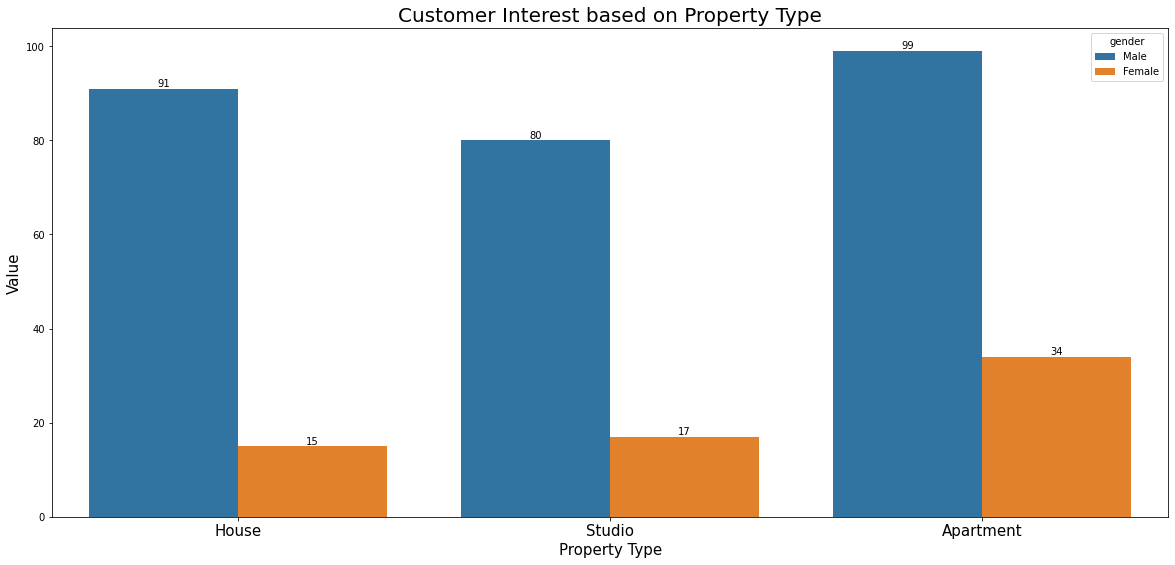

In [52]:
plt.figure(figsize=(20,9))

ax = sns.countplot(x='property_type', hue='gender', data=df_forBI)

plt.ylabel('Value', fontsize=15)
plt.xticks(np.arange(3), ['House', 'Studio', 'Apartment'], fontsize=15)
plt.xlabel('Property Type', fontsize=15)

ax.set_title(label='Customer Interest based on Property Type', fontsize=20)

# Anote count value
for container in ax.containers:
  ax.bar_label(container)

plt.show()

## Analysis of the influence of marital status on the loan term (year) 

In [42]:
df_forBI.groupby(['loan_term_year', 'married']).agg({'loan_term_year':'count'})

loan_term_year
loan_term_year married                
3              No                    2
7              Yes                   3
10             No                    1
               Yes                   1
15             No                    4
               Yes                  17
20             Yes                   2
25             No                    3
               Yes                   4
30             No                  116
               Yes                 173
40             No                    6
               Yes                   4

In [55]:
# groupby and reindex to add missing combinations
df_grouped = df_forBI.groupby(['loan_term_year', 'married']).agg({'loan_term_year':'count'})
idx = pd.MultiIndex.from_product([df_grouped.index.levels[0], df_grouped.index.levels[1]], names=df_grouped.index.names)
df_grouped = df_grouped.reindex(idx, fill_value=0)
df_grouped

loan_term_year
loan_term_year married                
3              No                    2
               Yes                   0
7              No                    0
               Yes                   3
10             No                    1
               Yes                   1
15             No                    4
               Yes                  17
20             No                    0
               Yes                   2
25             No                    3
               Yes                   4
30             No                  116
               Yes                 173
40             No                    6
               Yes                   4

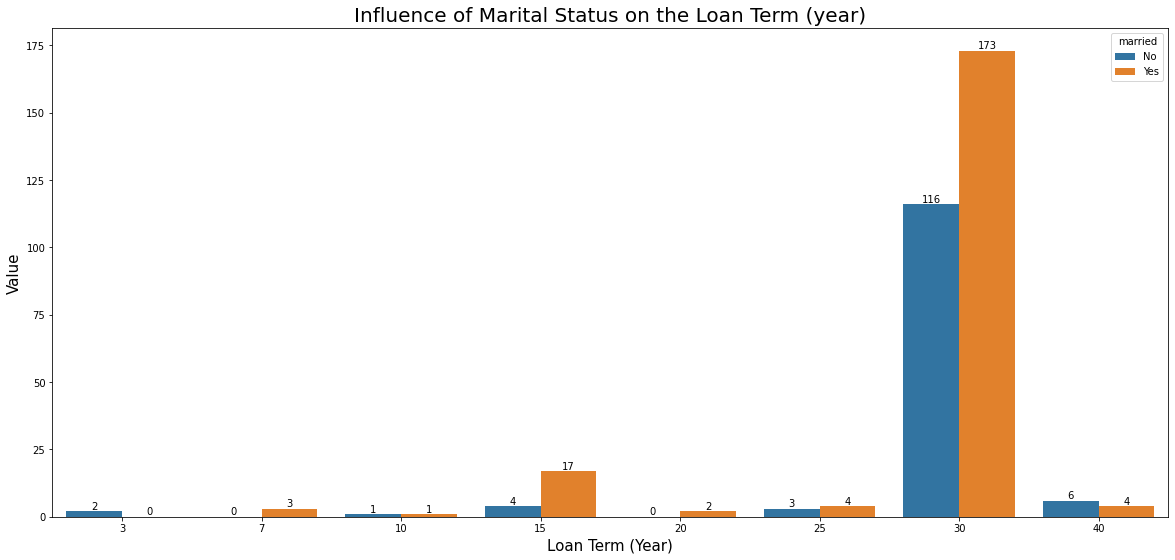

In [61]:
plt.figure(figsize=(20,9))

ax = sns.barplot(x=df_grouped.index.get_level_values(0), y=df_grouped.values.flatten(), hue=df_grouped.index.get_level_values(1))

plt.ylabel('Value', fontsize=15)
plt.xlabel('Loan Term (Year)', fontsize=15)

ax.set_title(label='Influence of Marital Status on the Loan Term (year)', fontsize=20)

# Anote count value
for container in ax.containers:
  ax.bar_label(container)

plt.show()